<a href="https://colab.research.google.com/github/pawan-git7979/CIFAR10-CNN-image-classfication/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello world")

hello world


Small Image Classification Using Convolutional Neural Network (CNN)



In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt
import numpy as np

Load Dataset


In [5]:
(X_train , y_train ),(X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1 , )
y_test = y_test.reshape(-1 ,)

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


Let's Plot some images to see what they are

In [12]:
def plot_sample(X , y , index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  

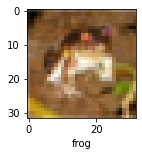

In [13]:
plot_sample(X_train , y_train , 0)

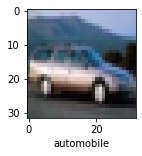

In [14]:
plot_sample(X_train , y_train , 4)

Normalizing the training Data

In [15]:
X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

Building Simple Artificial Neural Network for image classfication

In [19]:
# ann = models.Sequential([
#               layers.Flatten(input_shape=(32,32,3)),
#               layers.Dense(3000 , activation='relu'),
#               layers.Dense(1000 , activation='relu'),
#               layers.Dense(10 , activation='sigmoid')
# ])
# ann.compile(optimizer='SGD',
#             loss='sparse_categorial_crossentropy',
#             metrics=['accuracy'])
# ann.fit(X_train , y_train , epochs=7)

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=7)


Epoch 1/7
1563/1563 [==============================] - 12s 6ms/step - loss: 1.9256 - accuracy: 0.3073
Epoch 2/7
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6445 - accuracy: 0.4201
Epoch 3/7
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5535 - accuracy: 0.4518
Epoch 4/7
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4873 - accuracy: 0.4783
Epoch 5/7
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4465 - accuracy: 0.4922
Epoch 6/7
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3989 - accuracy: 0.5071
Epoch 7/7
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3525 - accuracy: 0.5247


We can clearly see that the accuracy at the end of 7 epochs is only 52%

We need to improve the accuracy

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred =  ann.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.64      0.57      1000
           1       0.66      0.62      0.64      1000
           2       0.44      0.30      0.36      1000
           3       0.37      0.35      0.36      1000
           4       0.40      0.43      0.42      1000
           5       0.43      0.40      0.42      1000
           6       0.69      0.25      0.37      1000
           7       0.37      0.78      0.50      1000
           8       0.63      0.62      0.62      1000
           9       0.67      0.48      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.52      0.49      0.48     10000
weighted avg       0.52      0.49      0.48     10000



Now let us build a convolutional neural network to train our images


In [33]:
cnn = models.Sequential([
                         layers.Conv2D(filters=32 , kernel_size=(3, 3) , activation='relu' , input_shape=(32,32,3)),
                         layers.MaxPooling2D((2, 2)),

                         layers.Conv2D(filters=128 ,kernel_size=(3, 3) , activation='relu'),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(64 , activation='relu'),
                         layers.Dense(10 , activation='softmax')
                                
])

In [37]:
cnn.compile(optimizer='adam' , 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [38]:
cnn.fit(X_train , y_train , epochs=15)

Epoch 1/15
1563/1563 [==============================] - 38s 7ms/step - loss: 1.7443 - accuracy: 0.3656
Epoch 2/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1404 - accuracy: 0.5971
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9870 - accuracy: 0.6562
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8769 - accuracy: 0.6961
Epoch 5/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7977 - accuracy: 0.7252
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7316 - accuracy: 0.7493
Epoch 7/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6871 - accuracy: 0.7605
Epoch 8/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6438 - accuracy: 0.7784
Epoch 9/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6036 - accuracy: 0.7886
Epoch 10/15
1563/1563 [==============================] - 10s 7ms/step - l

With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [39]:
cnn.evaluate(X_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0844 - accuracy: 0.6959


[1.0843852758407593, 0.695900022983551]

In [40]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.5412763e-05, 1.4317579e-06, 3.2874788e-04, 9.7374177e-01,
        1.7145815e-03, 1.7707393e-02, 6.4726421e-03, 1.1859667e-06,
        4.8842176e-06, 1.9385895e-06],
       [5.3836295e-04, 2.9911708e-02, 4.1914230e-10, 6.2940840e-11,
        1.2555148e-15, 7.0232724e-15, 3.2090126e-11, 4.8422826e-18,
        9.6950960e-01, 4.0343770e-05],
       [4.6191418e-01, 7.8557163e-02, 2.1502913e-03, 5.4090987e-03,
        7.4326075e-05, 9.3579902e-06, 2.1830183e-05, 1.0331739e-03,
        4.4806165e-01, 2.7689131e-03],
       [9.9419034e-01, 2.9775646e-04, 2.6895115e-03, 7.9144782e-05,
        8.5444459e-05, 4.6183480e-08, 6.5581887e-08, 4.4225956e-08,
        2.6577506e-03, 7.1579559e-10],
       [2.0861826e-08, 4.5361717e-10, 8.1305177e-04, 9.0261754e-03,
        9.5020723e-01, 8.7949383e-04, 3.9073542e-02, 4.7320640e-07,
        3.7523108e-08, 5.6114371e-09]], dtype=float32)

In [42]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

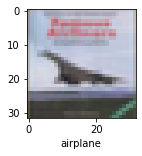

In [44]:
plot_sample(X_test , y_test , 3)

In [45]:
classes[y_classes[3]]

'airplane'

In [47]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
print("Classfication Report;\n" ,classification_report(y_test , y_classes))

Classfication Report;
               precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.75      0.88      0.81      1000
           2       0.61      0.57      0.59      1000
           3       0.51      0.52      0.51      1000
           4       0.58      0.74      0.65      1000
           5       0.59      0.66      0.62      1000
           6       0.87      0.66      0.75      1000
           7       0.78      0.70      0.74      1000
           8       0.84      0.72      0.78      1000
           9       0.82      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

